# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# Create the city DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"])["ride_id"].count()
# Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"])["ride_id"].count()
# Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"])["ride_id"].count()

In [4]:
# 2. Get the total drivers for each city type
urban_driver_count = urban_cities_df.groupby(["city"])["driver_count"].mean().sum()
suburban_driver_count = suburban_cities_df.groupby(["city"])["driver_count"].mean().sum()
rural_driver_count = rural_cities_df.groupby(["city"])["driver_count"].mean().sum()

In [5]:
#  3. Get the total amount of fares for each city type
urban_fare_count = urban_cities_df.groupby(["city"]).sum()["fare"]
suburban_fare_count = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_fare_count = rural_cities_df.groupby(["city"]).sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 
urban_avg_fare_ride = urban_fare_count.sum() / urban_ride_count.sum() 
suburban_avg_fare_ride = suburban_fare_count.sum()  / suburban_ride_count.sum() 
rural_avg_fare_ride = rural_fare_count.sum()  / rural_ride_count.sum()

In [7]:
# 5. Get the average fare per driver for each city type. 
urban_avg_fare_driver = urban_fare_count.sum() / urban_driver_count
suburban_avg_fare_driver = suburban_fare_count.sum() / suburban_driver_count
rural_avg_fare_driver = rural_fare_count.sum() / rural_driver_count

In [8]:
#Calculate sums for summary
rural_ride_sum = rural_ride_count.sum()
suburban_ride_sum = suburban_ride_count.sum()
urban_ride_sum = urban_ride_count.sum()

rural_driver_sum = rural_driver_count.sum()
suburban_driver_sum = suburban_driver_count.sum()
urban_driver_sum = urban_driver_count.sum()

rural_fare_sum = rural_fare_count.sum()
suburban_fare_sum = suburban_fare_count.sum()
urban_fare_sum = urban_fare_count.sum()

urban_grand_avg_ride = round(urban_avg_fare_ride,6)
suburban_grand_avg_ride = round(suburban_avg_fare_ride,6)
rural_grand_avg_ride = round(rural_avg_fare_ride,6)

urban_grand_avg_driver = round(urban_avg_fare_driver,6)
suburban_grand_avg_driver = round(suburban_avg_fare_driver,6)
rural_grand_avg_driver = round(rural_avg_fare_driver,6)

In [9]:
#  6. Create a PyBer summary DataFrame.
city_list = ["rural","suburban","urban"]
data = [{"Total Rides":rural_ride_sum,
         "Total Drivers":rural_driver_sum,
         "Total Fares":rural_fare_sum,
         "Average Fare per Ride":rural_grand_avg_ride,
         "Average Fare per Driver":rural_grand_avg_driver
        },
        {"Total Rides":suburban_ride_sum,
         "Total Drivers":suburban_driver_sum,
         "Total Fares":suburban_fare_sum,
         "Average Fare per Ride":suburban_grand_avg_ride,
         "Average Fare per Driver":suburban_grand_avg_driver
        },
        {"Total Rides":urban_ride_sum,
         "Total Drivers":urban_driver_sum,
         "Total Fares":urban_fare_sum,
         "Average Fare per Ride":urban_grand_avg_ride,
         "Average Fare per Driver":urban_grand_avg_driver
        }]
pyber_summary_df = pd.DataFrame.from_records(data,index=city_list)

In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
rural,125,78,"$4,327.93",$34.62,$55.49
suburban,625,490,"$19,356.33",$30.97,$39.50
urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_sum_df = pyber_data_df.groupby(["type","date"])["fare"].sum()

In [13]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_sum_df = fare_sum_df.reset_index()

In [14]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_sum_df_pivot = fare_sum_df.pivot(index='date',columns='type',values='fare')

In [15]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_sum_df_dates = fare_sum_df_pivot.loc['2019-01-01':'2019-04-29']

In [16]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fare_sum_df_dates.index = pd.to_datetime(fare_sum_df_dates.index)

In [17]:
# 14. Check that the datatype for the index is datetime using df.info()
fare_sum_df_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [18]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_sum_resample = fare_sum_df_dates.resample('W').sum()
fare_sum_resample

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 1.0, 'Total Fare by City Type')

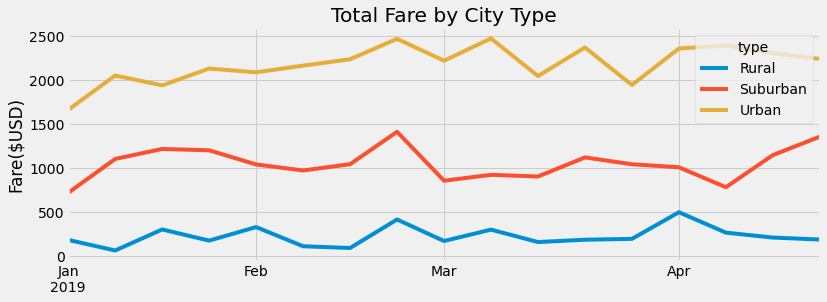

In [34]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
axis = fare_sum_resample.plot(figsize=(12,4))
axis.set_ylabel("Fare($USD)")
axis.set_xlabel(None)
axis.set_title("Total Fare by City Type")

In [36]:
figure = axis.get_figure()
figure.savefig("analysis/PyBer_fare_summary.png")